# Benchmarking


## <span style="color:lightblue">Installation des dépendances</span>


In [37]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


## <span style="color:lightblue">Importation des dépendances</span>


In [38]:
import numpy as np
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
from sklearn.metrics import confusion_matrix

from utils import extract_annotations_from_file, extract_predictions_from_file, evaluate_metrics, display_metrics, prepare_confusion_matrix, plot_confusion_matrix

## <span style="color:lightblue">Code principale</span>


### <span style="color:lightgreen">Environnement</span>


In [39]:
ANNOTATIONS_FILE_PATH = "annotations.json"
PREDICTIONS_FILE_PATH = "predictions.json"

### <span style="color:lightgreen">Récupération des données</span>


In [40]:
y_true, class_names = extract_annotations_from_file(ANNOTATIONS_FILE_PATH)
y_pred, y_scores = extract_predictions_from_file(ANNOTATIONS_FILE_PATH, PREDICTIONS_FILE_PATH)
coco_annotations = COCO(ANNOTATIONS_FILE_PATH)
coco_predictions = coco_annotations.loadRes(PREDICTIONS_FILE_PATH)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!


### <span style="color:lightgreen">mAP</span>


Initialiser l'évaluation


In [41]:
coco_eval = COCOeval(coco_annotations, coco_predictions, iouType="bbox")

Calculer le mAP


In [42]:
coco_eval.evaluate()
coco_eval.accumulate()
coco_eval.summarize()

Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.084
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.084
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.084
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.084
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.167
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.167
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.167
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=

### <span style="color:lightgreen">F1 Score</span>


In [43]:
precision, recall, scores, iou_lookup = evaluate_metrics(coco_eval)
display_metrics(precision, recall, scores, iou_lookup, class_name=None)

for cat in coco_annotations.loadCats(coco_annotations.getCatIds()):
        coco_eval.params.catIds = [cat["id"]]
        precision, recall, scores, iou_lookup = evaluate_metrics(coco_eval)
        display_metrics(precision, recall, scores, iou_lookup, class_name=cat["name"])

|-------------------------------------------|
| IoU | mAP | F1-Score | Precision | Recall |
|-----|-----|----------|-----------|--------|
| 0.50|8.42|      0.09|       0.11|    0.08|
| 0.55|8.42|      0.09|       0.11|    0.08|
| 0.60|8.42|      0.09|       0.11|    0.08|
| 0.65|8.42|      0.09|       0.11|    0.08|
| 0.70|8.42|      0.09|       0.11|    0.08|
| 0.75|8.42|      0.09|       0.11|    0.08|
| 0.80|8.42|      0.09|       0.11|    0.08|
| 0.85|8.42|      0.09|       0.11|    0.08|
| 0.90|8.42|      0.09|       0.11|    0.08|
| 0.95|8.42|      0.09|       0.11|    0.08|

|-------------------------------------------|
| Class Name : ocelot
|-------------------------------------------|
| IoU | mAP | F1-Score | Precision | Recall |
|-----|-----|----------|-----------|--------|
| 0.50|8.42|      0.09|       0.11|    0.08|
| 0.55|8.42|      0.09|       0.11|    0.08|
| 0.60|8.42|      0.09|       0.11|    0.08|
| 0.65|8.42|      0.09|       0.11|    0.08|
| 0.70|8.42|      0.09|  

### <span style="color:lightgreen">Matrice de confusion</span>


Ajout d'une classe 'nothing' lorsque rien n'est détecté.


In [44]:
class_names.append("nothing")

Préparation des données pour la matrice de confusion.


In [45]:
y_true_flat, y_pred_flat, classes = prepare_confusion_matrix(y_true, y_pred)

Calcul de la matrice de confusion.


In [46]:
cm = confusion_matrix(y_true_flat, y_pred_flat, labels=classes)

Afficher la matrice de confusion.


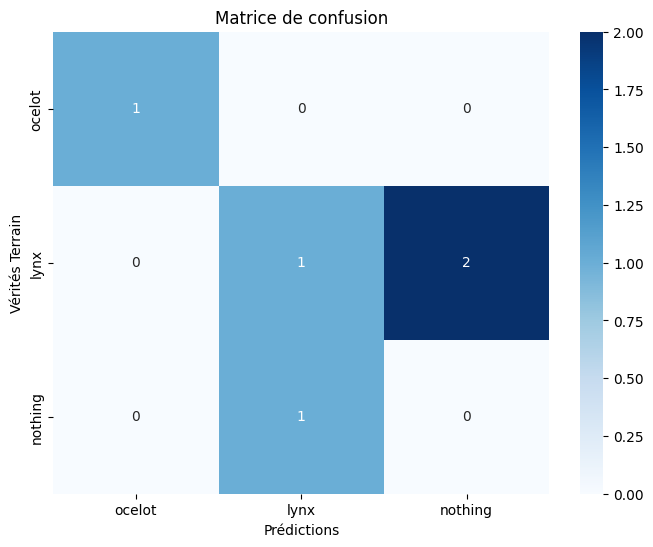

In [47]:
plot_confusion_matrix(cm, "d", class_names, "Matrice de confusion")

Afficher la matrice de confusion normalisée.


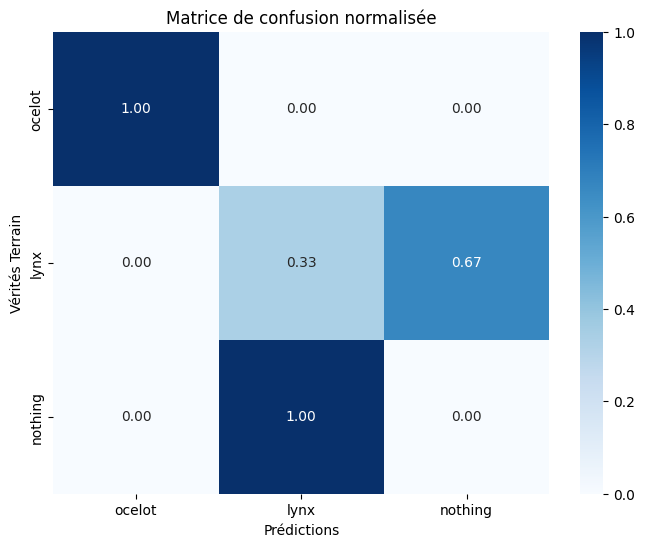

In [48]:
cm_normalized = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

plot_confusion_matrix(cm_normalized, ".2f", class_names, "Matrice de confusion normalisée")